In [ ]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib import cm
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

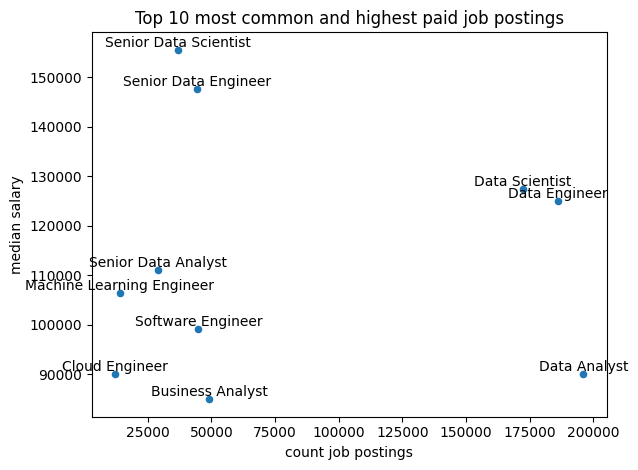

In [ ]:
pd_scatter = df.groupby('job_title_short').agg({
    'job_title_short': 'size',
    'salary_year_avg': 'median'
}).head(10).sort_index(ascending=False)

pd_scatter.plot(kind='scatter', x='job_title_short', y='salary_year_avg')
plt.title('Top 10 most common and highest paid job postings')
plt.xlabel('count job postings')
plt.ylabel('median salary')
plt.tight_layout()

for i in range(len(pd_scatter)):
   job_count = pd_scatter['job_title_short'].iloc[i] # x werte holen
   mean_salary = pd_scatter['salary_year_avg'].iloc[i] # y werte holen
   job_title = pd_scatter.index[i] # text holen
   plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')